In [1]:
%matplotlib inline
import pandas as pd

## Live projects

In [2]:
df_live = pd.read_csv('live.csv', encoding='cp1252', index_col=0)
df_live.info()

C:\Users\Patrik\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (11,14,17,18,19,24,32,40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 88384 entries, 0 to 88383
Data columns (total 40 columns):
backers_count               88384 non-null int64
blurb                       88384 non-null object
category                    88384 non-null object
converted_pledged_amount    3591 non-null float64
country                     88384 non-null object
created_at                  88384 non-null int64
creator                     88384 non-null object
currency                    88384 non-null object
currency_symbol             88384 non-null object
currency_trailing_code      88384 non-null bool
current_currency            3591 non-null object
deadline                    88384 non-null int64
disable_communication       88384 non-null bool
friends                     1719 non-null object
goal                        88384 non-null float64
id                          88384 non-null int64
is_backing                  1719 non-null object
is_starrable                10652 non-null object
i

## Ended projects

In [3]:
df_ended = pd.read_csv('ended.csv', encoding='cp1252', index_col=0)
df_ended.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56874 entries, 0 to 56873
Data columns (total 40 columns):
backers_count               56874 non-null int64
blurb                       56872 non-null object
category                    56874 non-null object
converted_pledged_amount    1464 non-null float64
country                     56874 non-null object
created_at                  56874 non-null int64
creator                     56874 non-null object
currency                    56874 non-null object
currency_symbol             56874 non-null object
currency_trailing_code      56874 non-null bool
current_currency            1464 non-null object
deadline                    56874 non-null int64
disable_communication       56874 non-null bool
friends                     3 non-null object
goal                        56874 non-null float64
id                          56874 non-null int64
is_backing                  3 non-null object
is_starrable                4699 non-null object
is_starr

C:\Users\Patrik\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (11,14,17,18,19,24,32,40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Merging live with ended

In [4]:
# rename columns
df_ended.rename(columns=lambda name: name+'_end', inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56874 entries, 0 to 56873
Data columns (total 40 columns):
backers_count_end               56874 non-null int64
blurb_end                       56872 non-null object
category_end                    56874 non-null object
converted_pledged_amount_end    1464 non-null float64
country_end                     56874 non-null object
created_at_end                  56874 non-null int64
creator_end                     56874 non-null object
currency_end                    56874 non-null object
currency_symbol_end             56874 non-null object
currency_trailing_code_end      56874 non-null bool
current_currency_end            1464 non-null object
deadline_end                    56874 non-null int64
disable_communication_end       56874 non-null bool
friends_end                     3 non-null object
goal_end                        56874 non-null float64
id_end                          56874 non-null int64
is_backing_end                  3 non-n

In [5]:
# merge projects to single dataframe
df_projects = df_live.merge(df_ended, left_on='id', right_on='id_end')
df_projects.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65038 entries, 0 to 65037
Data columns (total 80 columns):
backers_count                   65038 non-null int64
blurb                           65038 non-null object
category                        65038 non-null object
converted_pledged_amount        0 non-null float64
country                         65038 non-null object
created_at                      65038 non-null int64
creator                         65038 non-null object
currency                        65038 non-null object
currency_symbol                 65038 non-null object
currency_trailing_code          65038 non-null bool
current_currency                0 non-null object
deadline                        65038 non-null int64
disable_communication           65038 non-null bool
friends                         904 non-null object
goal                            65038 non-null float64
id                              65038 non-null int64
is_backing                      904 non-nul

### Cleaning merged dataset

In [6]:
# drop duplicate columns
cols_to_drop = []
for col in df_live.columns:
    try:
        (df_projects[col] != df_projects[col+'_end']).value_counts()[True]
    except KeyError:
        cols_to_drop.append(col+'_end')
print(cols_to_drop)
df_projects.drop(cols_to_drop, axis=1, inplace=True)

['country_end', 'created_at_end', 'currency_end', 'currency_symbol_end', 'currency_trailing_code_end', 'goal_end', 'id_end', 'slug_end']


In [7]:
# drop columns with less than 50% of values
df_projects.dropna(axis=1, thresh=df_projects.shape[0]/2, inplace=True)

In [8]:
df_projects.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65038 entries, 0 to 65037
Data columns (total 50 columns):
backers_count                65038 non-null int64
blurb                        65038 non-null object
category                     65038 non-null object
country                      65038 non-null object
created_at                   65038 non-null int64
creator                      65038 non-null object
currency                     65038 non-null object
currency_symbol              65038 non-null object
currency_trailing_code       65038 non-null bool
deadline                     65038 non-null int64
disable_communication        65038 non-null bool
goal                         65038 non-null float64
id                           65038 non-null int64
launched_at                  65038 non-null int64
location                     65038 non-null object
name                         65038 non-null object
photo                        65038 non-null object
pledged                      650

### Resolving inconsistency

#### launched_at

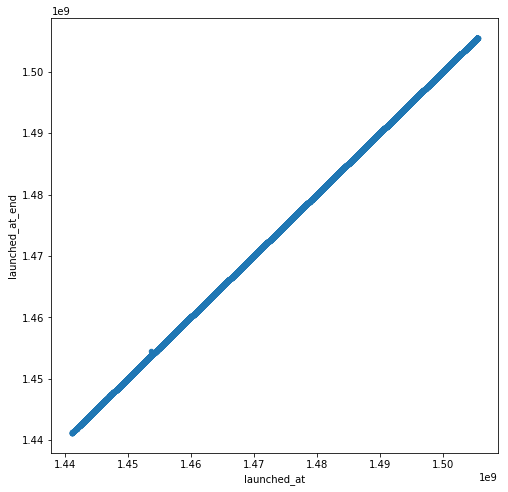

In [9]:
df_projects.plot(x='launched_at', y='launched_at_end', kind='scatter', figsize=(8,8))

In [10]:
# this should not contain True, but it does => inconsistency in dataset
(df_projects['launched_at'] != df_projects['launched_at_end']).value_counts()

False    65037
True         1
dtype: int64

In [11]:
# look at values
df_projects[(df_projects['launched_at'] != df_projects['launched_at_end'])][['id','name','launched_at','launched_at_end']]

,id,name,launched_at,launched_at_end
9271,615482414,"Instant Hydrator, Hydrates,All Natural, Digest...",1453784664,1454537838


In [12]:
# first value is incorrect, drop first column
# https://www.kickstarter.com/projects/1428469449/instant-hydrator-hydratesall-natural-digestive-ph
df_projects.drop('launched_at', axis=1, inplace=True)

#### deadline

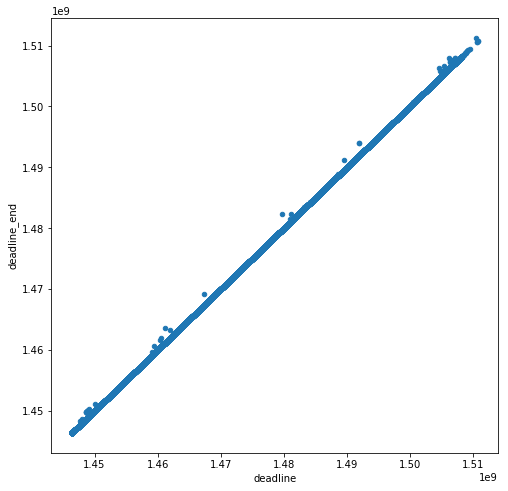

In [13]:
df_projects.plot(x='deadline', y='deadline_end', kind='scatter', figsize=(8,8))

In [14]:
# this should not contain True, but it does => inconsistency in dataset
(df_projects['deadline'] != df_projects['deadline_end']).value_counts()

False    64980
True        58
dtype: int64

In [15]:
# look at values
df_projects[(df_projects['deadline'] != df_projects['deadline_end'])][['id','name','deadline','deadline_end']].head(10)

,id,name,deadline,deadline_end
619,603503453,"The Monsieur Barbier Box : Shaving & Music, Ra...",1448922180,1449613380
633,1495917692,2016 Letterpress Calendar . The creative manif...,1449009780,1449441780
1345,1378352264,Casablancas | The Man Who Loved Women,1449164045,1450287245
1366,1866394158,I Love Therefore I Am - Documentary,1448866800,1449730800
1780,1020745465,SECOND CHANCE - DEUXI?ME CHANCE,1450016445,1451226045
2110,2044197681,Welcome to Another World!,1448018810,1448623610
2284,281156070,Würm : a prehistoric RPG,1449239761,1449671761
2381,174456433,Pur cashmere poncho Workshop,1448756490,1449966090
2415,382060495,Pankapu: the Dreamkeeper,1448621976,1449831576
2487,1401246575,#lanouvelleolympe,1448630040,1449839640


In [16]:
# first values are incorrect again, drop first column
df_projects.drop('deadline', axis=1, inplace=True)

In [17]:
df_projects.to_csv('projects.csv')

## Analysing dataset

In [18]:
df_projects.describe()

,backers_count,created_at,goal,id,pledged,scraped_at,state_changed_at,static_usd_rate,usd_pledged,backers_count_end,deadline_end,launched_at_end,pledged_end,scraped_at_end,state_changed_at_end,static_usd_rate_end,usd_pledged_end
count,65038.000000,6.503800e+04,6.503800e+04,6.503800e+04,6.503800e+04,6.503800e+04,6.503800e+04,65038.000000,6.503800e+04,65038.000000,6.503800e+04,6.503800e+04,6.503800e+04,6.503800e+04,6.503800e+04,65038.000000,6.503800e+04
mean,93.181801,1.467838e+09,7.045290e+04,1.073002e+09,9.706526e+03,1.474094e+09,1.472475e+09,0.994714,8.547335e+03,159.475753,1.475652e+09,1.472475e+09,1.708096e+04,1.477562e+09,1.475610e+09,0.994716,1.502729e+04
std,924.687360,2.076627e+07,1.474647e+06,6.193397e+08,8.741706e+04,1.669881e+07,1.677239e+07,0.220278,8.302131e+04,1272.604621,1.672703e+07,1.677237e+07,1.353804e+05,1.639163e+07,1.672708e+07,0.220277,1.264395e+05
min,0.000000,1.266343e+09,1.000000e+00,1.852000e+04,0.000000e+00,1.446387e+09,1.441143e+09,0.009143,0.000000e+00,0.000000,1.446392e+09,1.441143e+09,0.000000e+00,1.450359e+09,1.446392e+09,0.009143,0.000000e+00
25%,1.000000,1.455334e+09,2.400000e+03,5.376639e+08,1.200000e+01,1.460689e+09,1.458759e+09,1.000000,1.200000e+01,2.000000,1.462058e+09,1.458759e+09,3.100000e+01,1.463290e+09,1.462036e+09,1.000000,3.093878e+01
50%,7.000000,1.467867e+09,7.000000e+03,1.072097e+09,3.860000e+02,1.473914e+09,1.471891e+09,1.000000,3.700000e+02,13.000000,1.475073e+09,1.471891e+09,7.510000e+02,1.476502e+09,1.474991e+09,1.000000,7.187814e+02
75%,41.000000,1.483904e+09,2.000000e+04,1.606240e+09,2.982000e+03,1.487227e+09,1.486687e+09,1.000000,2.778168e+03,75.000000,1.489795e+09,1.486687e+09,5.891750e+03,1.492298e+09,1.489787e+09,1.000000,5.563885e+03
max,145232.000000,1.505473e+09,1.000000e+08,2.147422e+09,1.102400e+07,1.505539e+09,1.505523e+09,1.557361,1.102400e+07,154926.000000,1.511283e+09,1.505523e+09,1.277984e+07,1.508088e+09,1.508084e+09,1.557361,1.277984e+07


In [19]:
df_projects['state_end'].value_counts()

failed        36190
successful    26342
canceled       2380
suspended       126
Name: state_end, dtype: int64

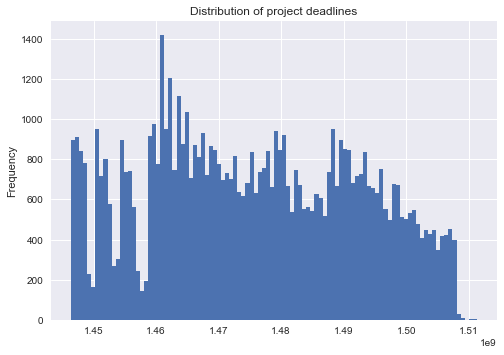

In [92]:
df_projects['deadline_end'].plot(kind='hist', bins=100, title='Distribution of project deadlines')

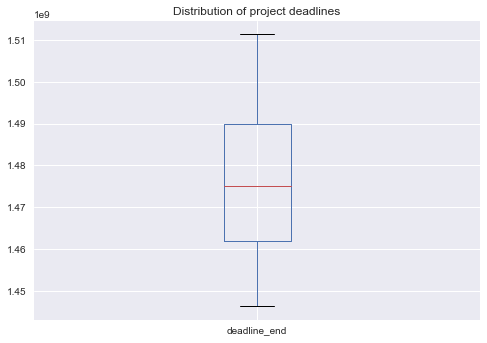

In [96]:
df_projects['deadline_end'].plot(kind='box', title='Distribution of project deadlines')

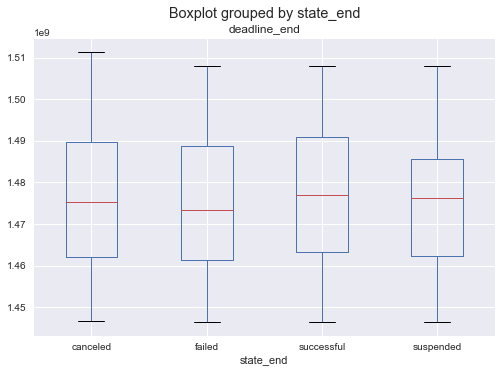

In [99]:
df_projects.boxplot(column='deadline_end', by='state_end')

In [32]:
from datetime import datetime

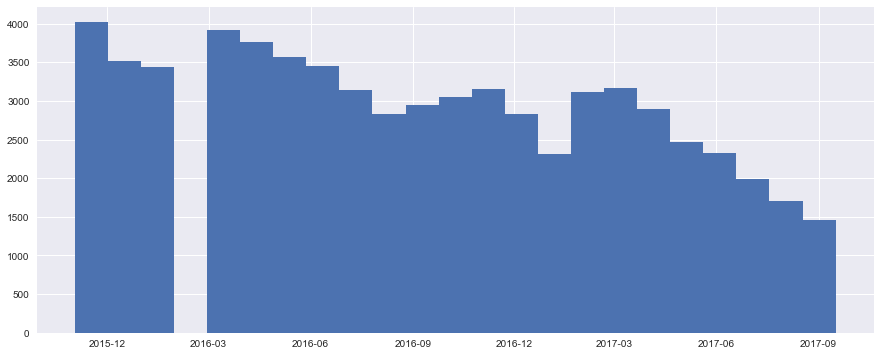

In [103]:
df = df_projects.apply(lambda x: datetime.fromtimestamp(x['scraped_at']), axis=1)
df.hist(bins=23, figsize=(15,6))

In [111]:
df = df_projects.apply(lambda x: (datetime.fromtimestamp(x['scraped_at']) - datetime.fromtimestamp(x['launched_at_end'])).days, axis=1)
df

0        14
1        11
2         7
3         8
4        54
5        25
6        30
7        21
8        11
9         6
10       28
11       26
12       12
13       16
14       32
15        3
16        9
17        5
18       15
19       15
20       37
21        9
22       55
23       26
24       38
25       40
26       16
27       32
28       16
29        2
         ..
65008     3
65009    10
65010    14
65011    16
65012    17
65013    18
65014    25
65015    26
65016    28
65017     1
65018    28
65019    12
65020    21
65021     4
65022     8
65023    14
65024    16
65025    23
65026    25
65027    26
65028     6
65029    10
65030    10
65031    12
65032    14
65033    15
65034    16
65035    21
65036    21
65037    28
Length: 65038, dtype: int64

TypeError: Cannot cast ufunc less input from dtype('float64') to dtype('<m8[ns]') with casting rule 'same_kind'

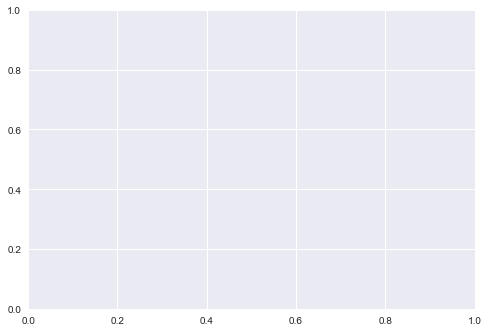

In [105]:
df.hist(bins=30)

In [58]:
df = df_projects.apply(lambda x: (datetime.fromtimestamp(x['deadline_end']) - datetime.fromtimestamp(x['scraped_at'])).days, axis=1)

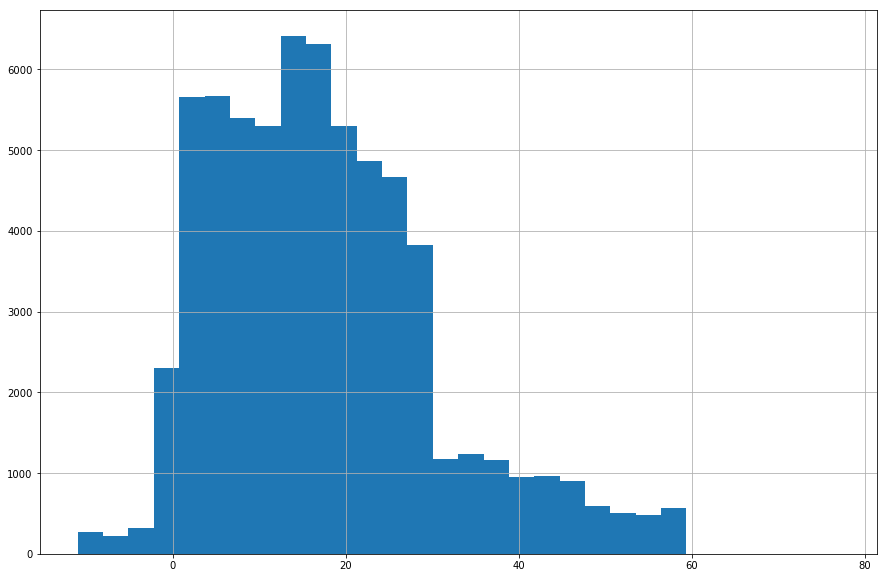

In [60]:
df.hist(bins=30, figsize=(15,10))

In [52]:
df = df_projects.apply(lambda x: (datetime.fromtimestamp(x['scraped_at_end']) - datetime.fromtimestamp(x['deadline_end'])).days, axis=1)

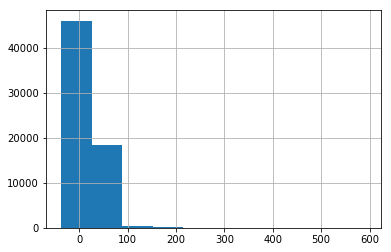

In [56]:
df.hist(bins=10)

In [90]:
import seaborn

In [91]:
seaborn.pairplot(df_projects.dropna(), hue='state')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


# Second dataset

In [ ]:
import mysql.connector as sql

In [ ]:
con = sql.connect(database='kickstarter', user='kickstarter', password='kickstarter')

In [ ]:
df_db = pd.read_sql('SELECT * FROM kickstarter.kickstarter_project', con, index_col='project_id')
df_db.head()

In [ ]:
df_db.tail()

In [ ]:
df_db.info()

In [ ]:
# project_id is sequence but we could use url for merging with first dataset
df_db.loc[1, 'url']

In [ ]:
df_projects.loc[1, 'urls']

In [ ]:
import ast

In [ ]:
# get project_url
df_projects['project_url'] = df_projects.apply(lambda x: ast.literal_eval(x['urls'])['web']['project'].split('?')[0], axis=1)

In [ ]:
# merge first and second dataset
df_projects.info()

In [ ]:
df_merged = df_projects.merge(df_db, left_on='project_url', right_on='url')

In [ ]:
df_merged.info()

In [ ]:
df_merged.to_csv('merged.csv')

In [ ]:
x = df_projects[~df_projects['id'].isin(df_merged['id'])]
x.loc[380, 'project_url']

In [ ]:
x

In [ ]:
x = x.drop_duplicates(subset='id')
x

In [ ]:
x = x.drop_duplicates(subset='project_url')
x

In [ ]:
x['project_url'].value_counts().sort_values(ascending=False)

In [ ]:
x[x['id']==6186729].loc[14136, 'project_url']

In [ ]:
x[x['id']==6186729].loc[14137, 'project_url']

In [ ]:
x['project_url'].to_csv('urls.csv', index=False)

In [ ]:
pd.read_csv('urls.txt')

In [ ]:
df_projects['state']